<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Data Dictionary

 
| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|tper capita crime rate by town|
| ZN|tproportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
| NOX|tnitric oxides concentration (parts per 10 million)|
| RM|taverage number of rooms per dwelling|
| AGE|tproportion of owner-occupied units built prior to 1940 |
| DIS|tweighted distances to five Boston employment centres |
| RAD|tindex of accessibility to radial highways |
| TAX |tfull-value property-tax rate per 10,000  |
| PTRATIO |t pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|
   

### Exploratory Data Analysis

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

## Task 4: Generate Descriptivr Statistics and Visualizations

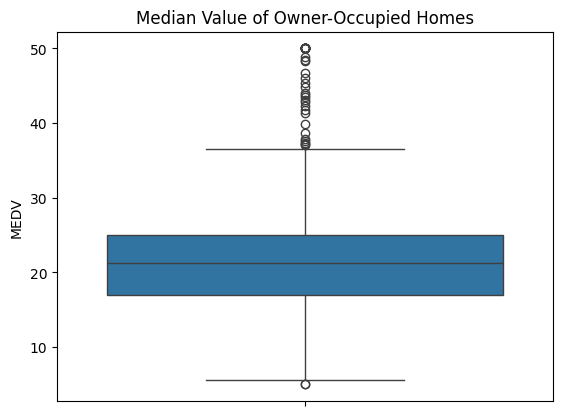

In [14]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes')

plt.show()


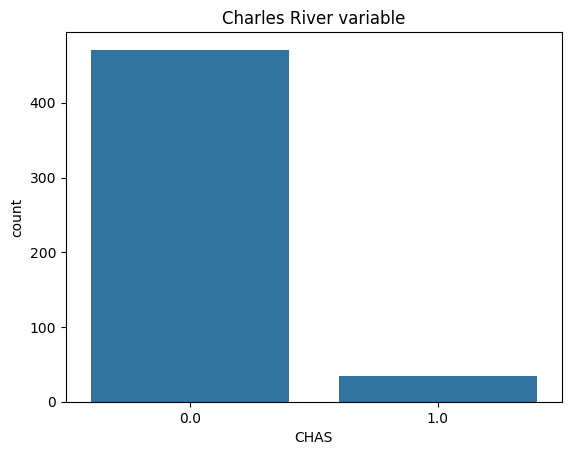

In [16]:
## Provide a histogram for the Charles River variable
sns.countplot(x = 'CHAS', data=boston_df)
plt.title('Charles River variable')

plt.show()


Text(0.5, 1.0, 'Median value of owner-occupied homes in $1000s among 3 age groups')

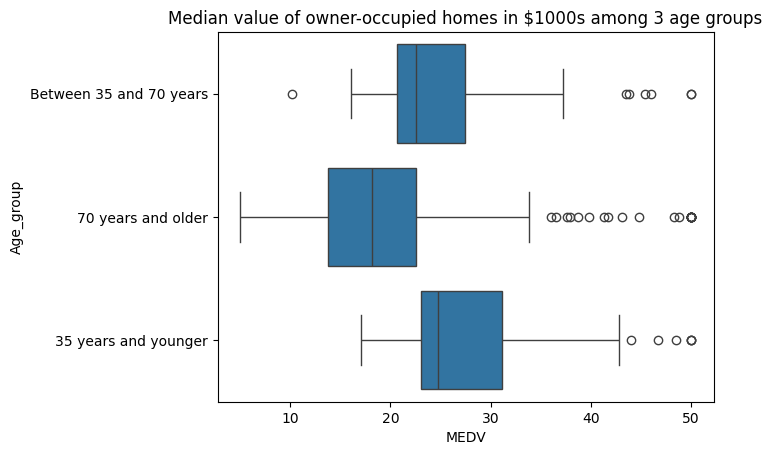

In [17]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE']<=35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'Age_group'] = '70 years and older'
boston_df

cc = sns.boxplot(x='MEDV',y='Age_group',data=boston_df)
cc.set_title('Median value of owner-occupied homes in $1000s among 3 age groups')

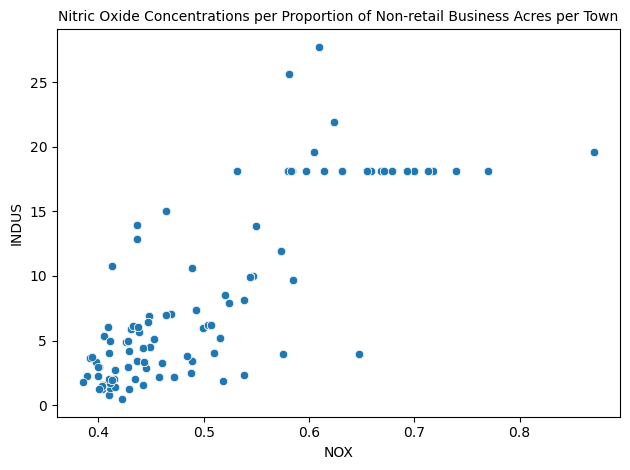

We can see a positive upward-sloping curve according to the scatterplot


In [20]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Nitric Oxide Concentrations per Proportion of Non-retail Business Acres per Town', fontsize = 10) 
plt.tight_layout()

plt.show()
print('We can see a positive upward-sloping curve according to the scatterplot')

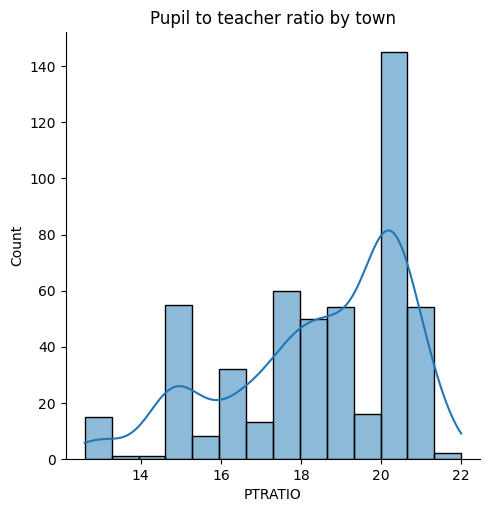

In [21]:
#Create a histogram for the pupil to teacher ratio variable
sns.displot(boston_df['PTRATIO'], kde=True)
plt.title('Pupil to teacher ratio by town')
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: u0 = u1 (No significant difference in median value of houses bounded by the Charles river)

H1: u0 =! u1 (There is significant difference in median value of houses bounded by the Charles river)

In [23]:
#Run levene's test to see the equal or unequal variance
ll = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
print(ll,'population variances are not equal')

tt = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print(tt)
print('p-value=',tt[1])
print('We reject H0 indicating that there is significant difference in median value of houses bounded by the Charles river')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829) population variances are not equal
Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)
p-value= 0.003567170098137517
We reject H0 indicating that there is significant difference in median value of houses bounded by the Charles river


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: uA = uB = uC (No significant difference) 

H1: At least one mean differs (There is significant difference) 


In [24]:
thirtyfive_lower = boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_group'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_group'] == '70 years and older']['MEDV']

kk = f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(kk)
print('p_value:',kk[1])
print('Reject H0, indicating that there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')

# boston_df

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
p_value: 1.7105011022702984e-15
Reject H0, indicating that there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: No correlation

H1: Correlated

In [25]:
pp = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pp)
print('p-value:', pp[1])
print('According to p-value, we rejected the H0, which means there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')

#boston_df

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)
p-value: 7.913361061211254e-98
According to p-value, we rejected the H0, which means there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [26]:

import statsmodels.api as sm

x=boston_df['DIS']
y=boston_df['MEDV']

x=sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

print('The impact:')
print('p-value: 1.21e-08')
print('R-squared: 0.062')

#boston_df

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        13:28:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0